In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving twitchdata-update.csv to twitchdata-update.csv


In [4]:
twitch_df = pd.read_csv("twitchdata-update.csv")
print(twitch_df.head())

    Channel  Watch time(Minutes)  ...  Mature    Language
0     xQcOW           6196161750  ...   False     English
1  summit1g           6091677300  ...   False     English
2    Gaules           5644590915  ...    True  Portuguese
3  ESL_CSGO           3970318140  ...   False     English
4      Tfue           3671000070  ...   False     English

[5 rows x 11 columns]


In [5]:
print(twitch_df.shape)

(1000, 11)


In [6]:
print(twitch_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB
None


In [7]:
duplicate_rows_df = twitch_df[twitch_df.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape)

number of duplicate rows:  (0, 11)


In [8]:
twitch_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Watch time(Minutes),1000.0,4.184279e+08,5.496355e+08,122192850.0,1.631899e+08,234990787.5,4.337399e+08,6.196162e+09
Stream time(minutes),1000.0,1.205152e+05,8.537620e+04,3465.0,7.375875e+04,108240.0,1.418438e+05,5.214450e+05
Peak viewers,1000.0,3.706505e+04,6.031431e+04,496.0,9.113750e+03,16676.0,3.756975e+04,6.393750e+05
Average viewers,1000.0,4.781040e+03,8.453685e+03,235.0,1.457750e+03,2425.0,4.786250e+03,1.476430e+05
Followers,1000.0,5.700541e+05,8.044134e+05,3660.0,1.705462e+05,318063.0,6.243322e+05,8.938903e+06
Followers gained,1000.0,2.055185e+05,3.399137e+05,-15772.0,4.375825e+04,98352.0,2.361308e+05,3.966525e+06
Views gained,1000.0,1.166817e+07,2.490572e+07,175788.0,3.880602e+06,6456323.5,1.219676e+07,6.701375e+08


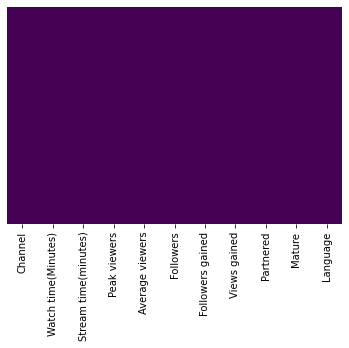

In [9]:
sn.heatmap(twitch_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')

Heat Map

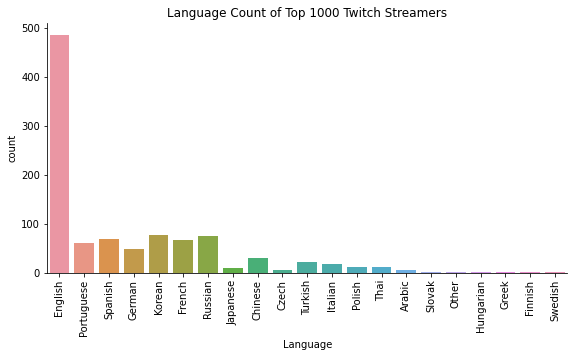

In [10]:
languages_count = sn.factorplot('Language',data=twitch_df,kind='count', size=4, aspect =2)
languages_count.set_xticklabels(rotation=90)
plt.title("Language Count of Top 1000 Twitch Streamers")
plt.show()

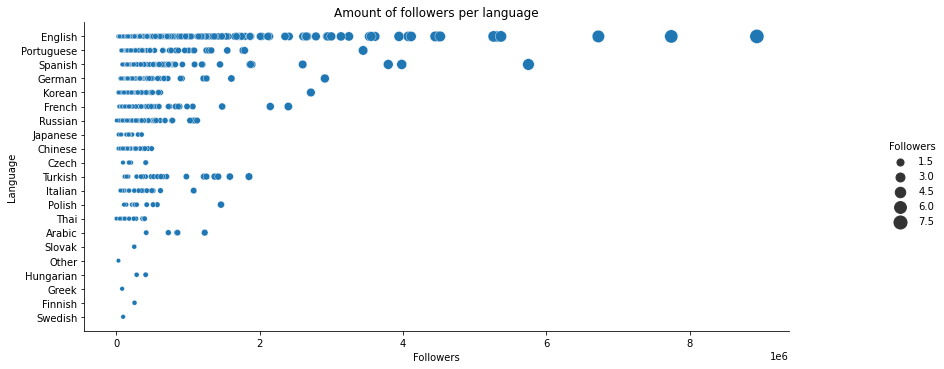

In [49]:
sn.relplot(x = twitch_df["Followers"], y = twitch_df["Language"], size = twitch_df["Followers"], sizes=(20,200), data = twitch_df )
plt.title ('Amount of followers per language')
plt.xlabel('Followers')
plt.ylabel('Language')
plt.gcf().set_size_inches(15, 5)
plt.show()

Text(0.5, 1.0, 'Maturity Count')

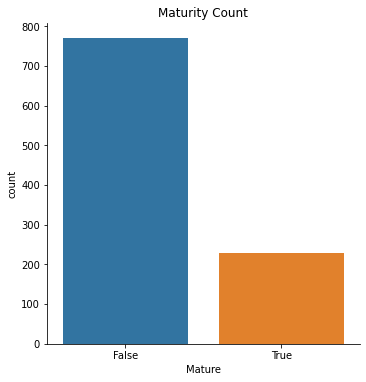

In [12]:
sn.factorplot('Mature',data=twitch_df,kind='count')
plt.title("Maturity Count")

Text(0.5, 1.0, 'Followers Gained Based on Maturity')

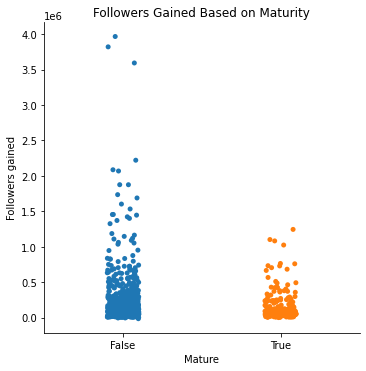

In [13]:
sn.catplot(data=twitch_df, x="Mature", y="Followers gained")
plt.title("Followers Gained Based on Maturity")

Text(0.5, 1.0, 'Count of Partnered Streamers')

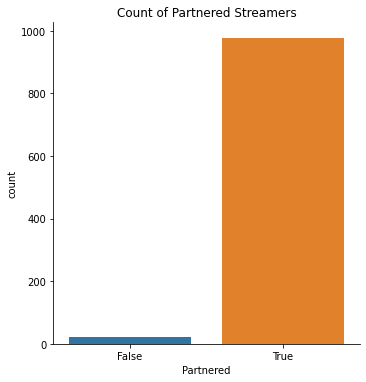

In [15]:
sn.factorplot('Partnered',data=twitch_df,kind='count')
plt.title("Count of Partnered Streamers")

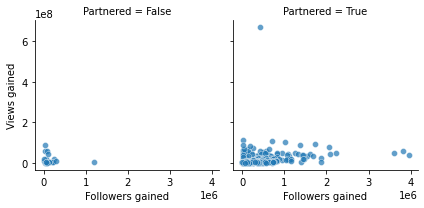

In [17]:
g = sn.FacetGrid(twitch_df, col="Partnered")
g.map(sn.scatterplot, "Followers gained", "Views gained", alpha=.7)


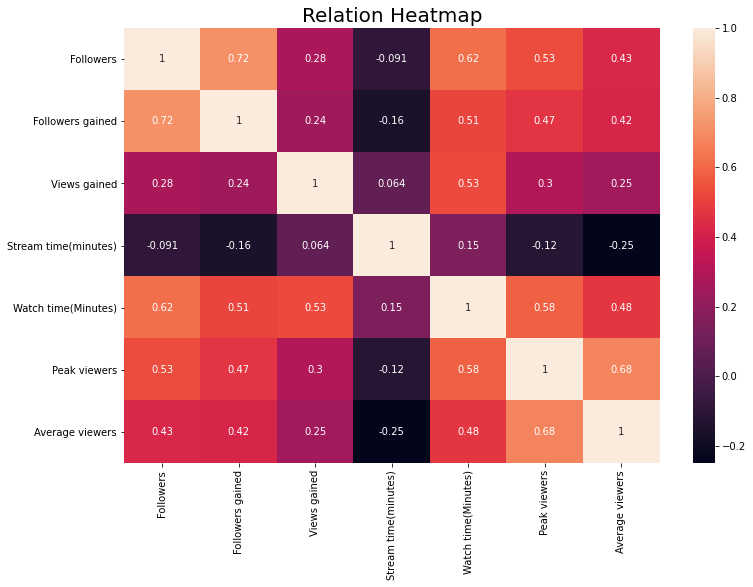

In [72]:
plt.figure(figsize=(12,8))
sn.heatmap(twitch_df[['Channel', 'Followers','Followers gained','Views gained','Stream time(minutes)','Watch time(Minutes)','Peak viewers','Average viewers']].corr(), annot = True)
plt.title('Relation Heatmap', fontsize = 20)
plt.show()

Blog Post: https://taylorye-42664.medium.com/top-1000-twitch-users-exploratory-data-analysis-e1b936e13693


Github: https://github.com/tayamber/Exploratory-Data-Analysis-Project.git